## <center>Homework 1</center>

### <center>CSE802: Pattern Recognition and Analysis</center><center>Instructor: Dr. Arun Ross</center><center>Total Points: 100</center>

### <center>_Jaturong Kongmanee_</center>

**1.  The IMOX dataset consists of 192 8-dimensional patterns pertaining to four classes (digital characters ‘I’, ‘M’, ‘O’ and ‘X’). There are 48 patterns per class.  The 8 features correspond to the distance of a character to the (a) upper left boundary (x1), (b) lower right boundary (x2), (c) upper right boundary(x3), (d) lower left boundary (x4), (e) middle left boundary (x5), (f) middle right boundary (x6), (g) middle upper boundary (x7), and (h) middle lower boundary (x8). Note that the class labels (1, 2, 3or 4) are indicated at the end of every pattern.**

(a) [4 points] Compute and report the mean pattern vector, i.e., the centroid, of _each class._

In [1]:
import numpy as np
import pandas as pd

DATASET_PATH = "datasets/imox.txt"
# DATASET_Q6_PATH = "datasets/q6.txt"

COLUMN_NAMES = ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "classes"]
# COLUMN_Q6_NAMES = ["x1", "x2", "classes"]


df = pd.read_fwf(DATASET_PATH, names=COLUMN_NAMES, header=None)
df.describe() #uncomment to see the data overview

,x1,x2,x3,x4,x5,x6,x7,x8,classes
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,7.145833,7.406250,6.885417,5.994792,7.119792,7.786458,5.296875,6.213542,2.500000
std,2.153673,2.607192,2.495524,2.257036,2.426128,3.058115,3.083547,3.095551,1.120957
min,2.000000,2.000000,3.000000,1.000000,3.000000,2.000000,0.000000,1.000000,1.000000
25%,6.000000,6.000000,5.000000,4.000000,5.000000,5.000000,3.000000,4.000000,1.750000
50%,7.000000,7.000000,6.000000,6.000000,7.000000,8.000000,5.000000,5.000000,2.500000
75%,9.000000,9.000000,8.000000,7.000000,9.000000,10.000000,7.000000,9.000000,3.250000
max,12.000000,14.000000,14.000000,16.000000,13.000000,14.000000,16.000000,15.000000,4.000000


In [2]:
mean_vec = []
for i in range(1, 5):
    data = df.loc[df["classes"] == i].describe()
    print("The mean pattern vector for class :==> {0}".format(i))
    print(data[1:2].drop(["classes"], axis=1))
    mean_vec.append(data[1:2].drop(["classes"], axis=1).to_numpy())
    print("===========================================================")

The mean pattern vector for class :==> 1
            x1        x2      x3      x4      x5       x6        x7        x8
mean  7.333333  9.208333  8.1875  5.9375  9.3125  11.4375  3.145833  3.770833
The mean pattern vector for class :==> 2
            x1     x2     x3      x4        x5        x6        x7      x8
mean  5.666667  5.125  5.375  6.0625  4.645833  4.604167  7.895833  9.4375
The mean pattern vector for class :==> 3
          x1        x2        x3        x4        x5        x6        x7  \
mean  7.3125  7.208333  6.729167  5.979167  5.333333  5.479167  3.729167   

            x8  
mean  4.208333  
The mean pattern vector for class :==> 4
            x1        x2    x3   x4      x5     x6        x7      x8
mean  8.270833  8.083333  7.25  6.0  9.1875  9.625  6.416667  7.4375


(b) [4 points] For _each class,_ determine the pattern (i.e., vector) from that class which is the farthest from the class mean. You can use the Euclidean distance metric for this problem.

In [3]:
print('The distance metric used is "Euclidean distance"')
for i in range(len(mean_vec)):
    c = df[df.classes == i+1]
    c = c[["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8"]].to_numpy()
    dist = 0
    farthest_vec = []
    for j in range(48):
        tem_dist = np.sqrt(np.sum([(a-b)*(a-b) for a, b in zip(c[j], mean_vec[i])]))
        if tem_dist > dist:
            dist = tem_dist
            farthest_vec = c[j]
#     print("The mean vector of class {} is {}".format(i+1, mean_vec[i]))
    print("The farthest vector from a class mean of class {} is {} with the distance \
          of {}".format(i+1, farthest_vec, dist))

The distance metric used is "Euclidean distance"
The farthest vector from a class mean of class 1 is [12.  9.  7. 13. 13.  8.  3.  2.] with the distance           of 15.313874654849581
The farthest vector from a class mean of class 2 is [ 2.  2.  5.  3.  3.  4.  8. 13.] with the distance           of 12.448452742989566
The farthest vector from a class mean of class 3 is [10.  9.  7.  7.  8.  7.  6.  6.] with the distance           of 12.528526477381307
The farthest vector from a class mean of class 4 is [ 2.  3. 12.  7.  8. 12.  7.  8.] with the distance           of 16.696314775522573


(c) [8 points] For _each feature,_ plot the histograms pertaining to the 4 classes. Your output should contain 8 graphs corresponding to the 8 features; _each graph_ should contain 4 histograms corresponding to the 4 classes (choose a bin size of your choice for the histograms). Based on these plots, indicate (a) the _features_ that are likely to be useful for distinguishing the 4 classes, and (b) the _classes_ that are likely to overlap with each other to a great extent. Provide an _explanation_ for your answer.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


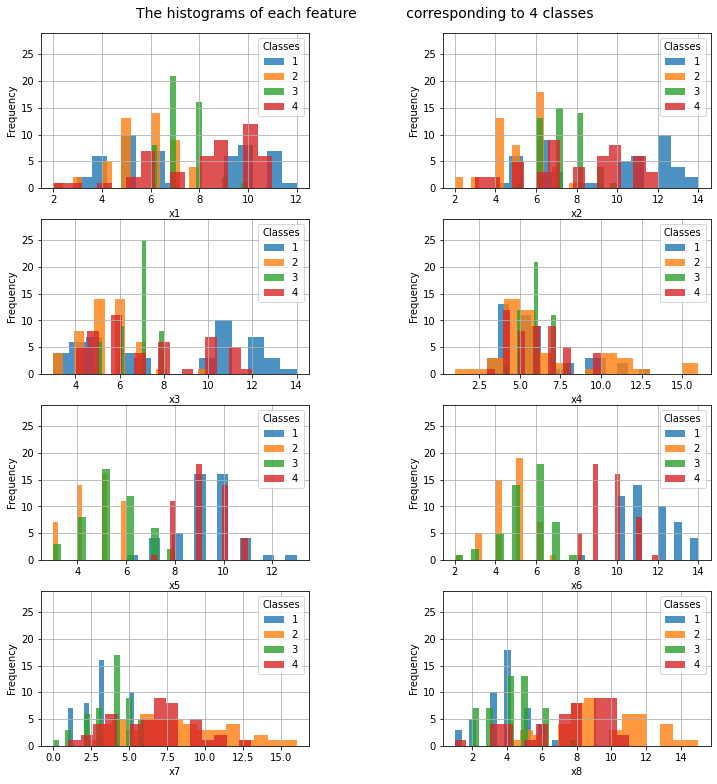

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_hist(bin_size, data, title):
    fig = plt.figure(figsize = (12,12))
    title = fig.suptitle(title, fontsize=14)
    fig.subplots_adjust(top=0.95, wspace=0.5)
    
    for i in range(1, 9):
        ax1 = fig.add_subplot(4,2, i)
        ax1.set_xlabel("x{0}".format(i))
        ax1.set_ylabel("Frequency") 
        ax1.set_ylim([0, 29])
        ax1.legend(title='Classes')
        data["x{0}".format(i)].plot.hist(bins=bin_size, alpha=0.8, legend=True, 
                                         grid=True)


df_1c = pd.read_fwf(DATASET_PATH, names=COLUMN_NAMES, header=None)
data = df_1c.groupby("classes")
plot_hist(bin_size=15, data=data, title="The histograms of each feature \
          corresponding to 4 classes")

- (a) the features that are likely to be useful for distinguishing the 4 classes.

    - With the variety of bin sizes ranging from 10 - 40, none of the features can separate these four classes using one feature alone. However, the feature _x6_ is likely to separate these four classes better than other features with multiple threshold values.

- (b) the classes that are likely to overlap with each other to a great extent.

    - For all features seen, classes 1 and 4 are likely to overlap with each other to a great extent. There are other overlapping regions between classes 2 and 4, but they are mostly from a specific range of each feature.

(d) [5 points] Assume that each pattern can be represented by features _x1_ and _x2._ This means, each pattern can be viewed as a point in 2-dimensional space. Draw a scatter plot showing all 192 patterns (use different labels/markers to distinguish between classes). Draw another scatter plot based on features _x3_ and _x4._ Based on these scatter plots, _explain_ which of the two feature _subsets_ _((x1,x2) or (x3,x4))_ is likely to be useful for separating the 4 classes.

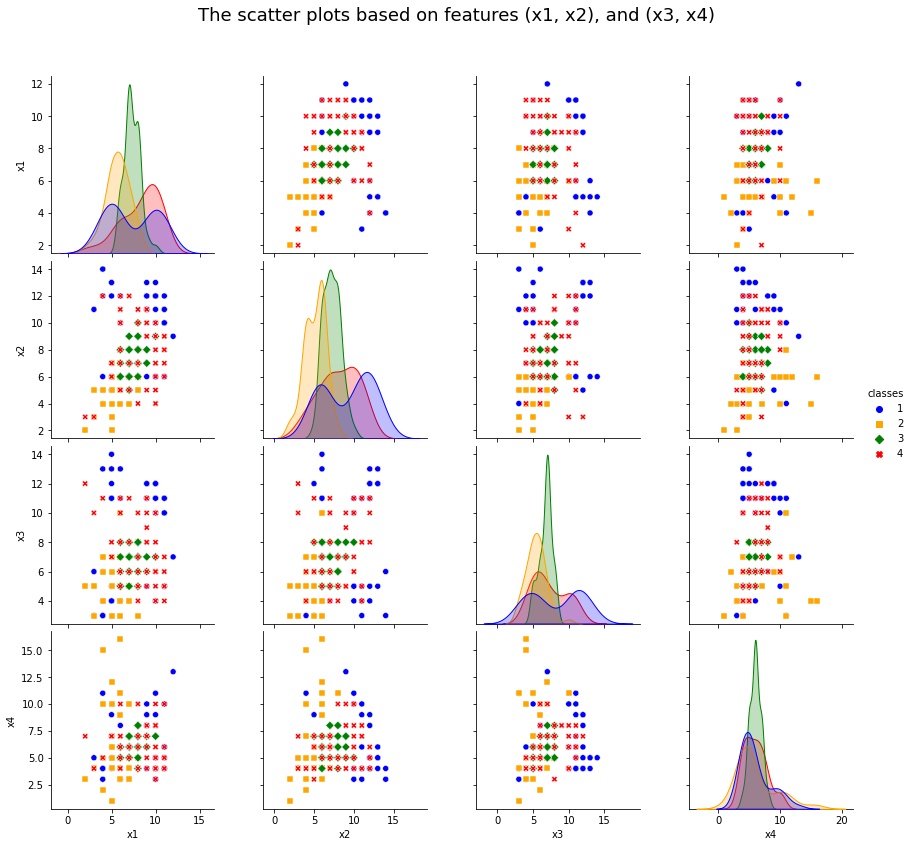

<Figure size 432x288 with 0 Axes>

In [5]:
import seaborn as sns

column_names = ["x1", "x2", "x3", "x4", "classes"]
df_1d = pd.read_fwf(DATASET_PATH, names=COLUMN_NAMES, header=None)

pp = sns.pairplot(df_1d[column_names], hue='classes', diag_kind="kde", 
                  height=3, markers=["o", "s", "D", "X"],
                 palette={1: "blue", 2: "orange", 3: "green", 4: "red"})

fig = plt.figure(figsize = (6,4))
fig = pp.fig 
fig.subplots_adjust(top=0.9, wspace=0.3)
t = fig.suptitle('The scatter plots based on features (x1, x2), and (x3, x4)', 
                 fontsize=18)

- As shown in the scatter plots above, the feature subset (x1, x2) is likely to classify four classes better than (x3, x4) with the simpler decision boundaries.

(e) [4 points] Assume that each pattern can be represented by features _(x1,x2,x4)._ Draw a 3-dimensional scatter plot showing all 192 patterns. Based on this scatter plot, _explain_ which classes overlap with each other to a great extent.

<IPython.core.display.Javascript object>


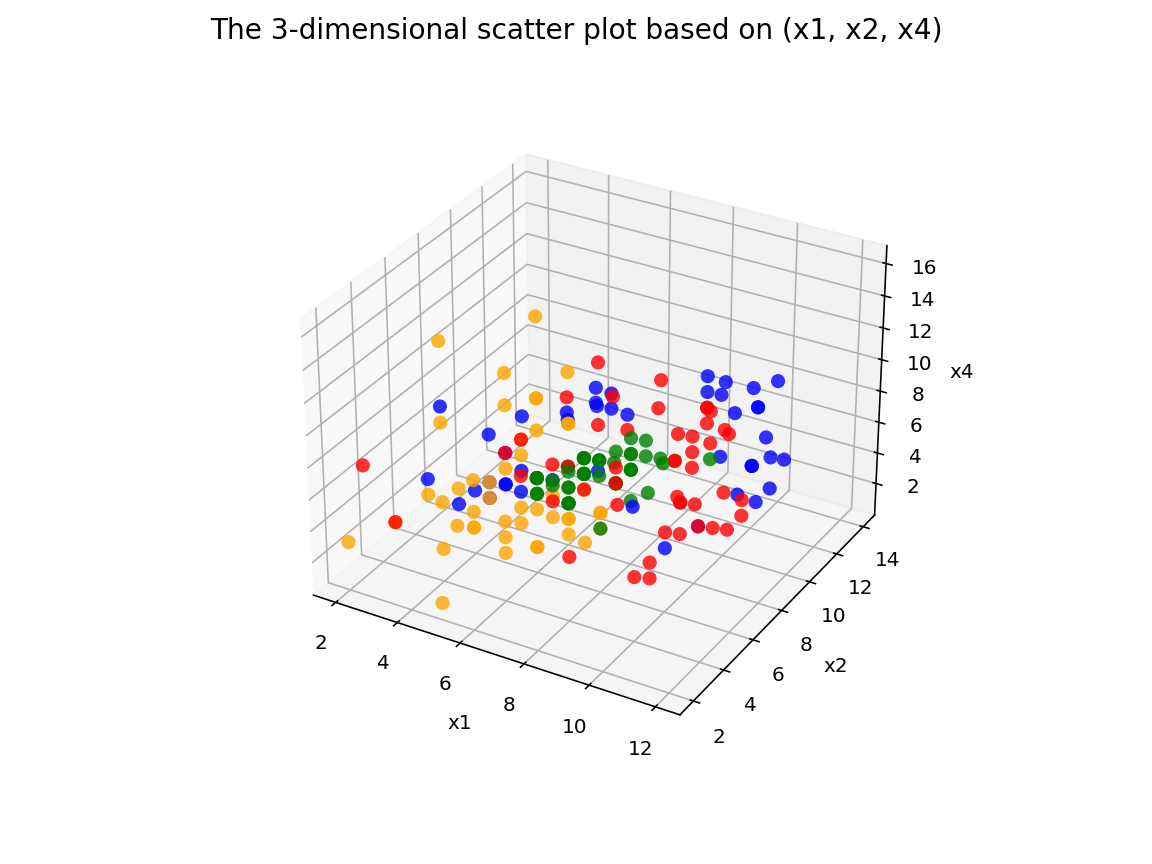

Total # patterns: 192
Blue :===> 1
Orange :=> 2
Green :==> 3
Red :====> 4


Text(0.5, 0, 'x4')

In [14]:
%matplotlib notebook

fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('The 3-dimensional scatter plot based on (x1, x2, x4)', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

column_names = ["x1", "x2", "x4", "classes"]
df_1e = pd.read_fwf(DATASET_PATH, names=COLUMN_NAMES, header=None)
xs = list(df_1e["x1"])
ys = list(df_1e["x2"])
zs = list(df_1e["x4"])

data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
print("Total # patterns: {}".format(len(data_points)))

colors = []
for wt in list(df_1e['classes']):
    if wt == 1:
        colors.append((1, "blue"))
    elif wt == 2:
        colors.append((2, "orange"))
    elif wt == 3:
        colors.append((3, "green"))
    else:
        colors.append((4, "red"))
        
print("Blue :===> 1")
print("Orange :=> 2")
print("Green :==> 3")
print("Red :====> 4")
      

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.8, c=color[1], edgecolors='none', s=50)
    
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x4')

- After different angles of view, it seems like classes 1 and 4 are likely to overlap with each other to a great extent.

**2. [10 points] What type of learning scheme - supervised, unsupervised, or reinforcement - can be used to address each of the following problems. You must _justify_ your answer.**

(a) Teaching a computer to play chess.

- `Reinforcement Learning` - This problem shows the interaction between the computer agent and its environment, in which an agent finds suitable moves of plays to maximize reward despite uncertainty about its environment. Note that the learning algorithm of an agent is not given examples of optimal outputs.

(b) Given a set of sea-shells, automatically group them into multiple categories.

- `Supervised Learning` - This problem consists of a training data set of sea-shells and their corresponding target vectors of multiple categories. The aim is to assign each input vector to one of a finite number of discrete categories.

(c) Determining the make and model of a car based on its side-view image.

- `Supervised Learning` - This problem consists of a data set of the car's side-view image. The desired outputs are the make and model of a car. Thus, the aim is to assign each input vector of the car's side-view image to multiple labels (i.e., two labels). 

(d) Predicting whether it would rain or not in the next 24 hours based on current weather conditions such as precipitation, humidity, temperature, wind, pressure, etc.

- `Supervised Learning` - This problem consists of a data set of the current weather conditions. There are two possible scenarios. First, the desired output is of two categories of rain or no rain for the classification problem. Second, for the regression problem, the corresponding target vectors are continuous values. Similarly, these two problems aim to assign each input feature vector of the future pattern to one of two discrete categories for classification problems and one or more continuous values for a regression problem.

(e) Automatically segmenting a digital image into multiple regions such that each region has a distinct color or texture.

- `Unsupervised Learning` – There is no information about the correct classes provided. Instead, the algorithm must discover the regions of similar input (i.e., digital images) within the data.

**3. [15 points] Describe each of the following terms with an example: (a) overfitting, (b) reject option, (c) decision boundary, (d) segmentation, (e) invariant representation.**

(a) overfitting

- `Overfitting` - refers to a situation when the model performs perfect classification on the training samples, but it is unlikely to perform well on unseen patterns.


- `An example:` - An image classifier can accurately classify an image training set comprising 1,000 classes, but the classifier’s accuracy on an unseen data set is around 50-60 percent.

(b) reject option

- `Reject Option` - refers to a situation when it will be appropriate for the classifier to avoid making a decision or say “I do not know” on the difficult cases in anticipation of a lower error rate on ambiguous examples.


- `An example:` - In some X-ray image classification applications, it may be appropriate to use an automatic classifier to classify X-ray images for which there is little confusion as to the correct classes while leaving the more ambiguous cases for a human expert to classify.

(c) decision boundary

- ` Decision boundary` - refers to the result of the dicision rule that assigns each value of the feature vector _X_ to one of the available classes. This decision boundary divides the input space into regions, called decision regions. All points that fall in a particular region are assigned to the decision region's corresponding class.


- `An example:` - In a simple binary classification application, the dark line is a decision boundary of the classifier giving the minimum classification error on the data consisting of two features of _width_, and _lightness_. 

_Reference: Pattern Classification by Duda, Hart and Stork, Second Edition, ISBN: 9-780471-056690._

![decision boundary](img/decision_boundary.png)

(d) segmentation

- `Segmentation` - refers to the process of isolating different objects of interest from one another and the background.


- `An example:` - In automated speech recognition, we want to recognize individual sounds and group them to determine the word.


(e) invariant representation

- `Invariant representation` - refers to the data representations that do not affect the classifier’s predictions.


- `An example:` - In two-dimensional image classification, such as handwritten digits, a particular pattern should be classified to the same class irrespective of its size or its position within the image.


**4. [20 points] The paper _Bird Species Recognition Using Support Vector Machines_ by Fagerlund discusses a pattern classification system that determines bird species based on their vocalization.**

(a) Briefly describe this system based on the pattern recognition terminology developed in class:  (i) sensors used; (ii) segmentation method; (iii) features extracted; and (iv) classification model. How many features (i.e., d) and classes (i.e., c) are present?

- (i) sensors used
    - Bird Songs and Calls recording device
    
    
- (ii) segmentation method
    - An iterative time-domain algorithm was used to segment a recording into individual syllables. This algorithm's resulting output is that the candidate syllables with less than 15 milliseconds apart from each other are grouped as one syllable.
    
    
- (iii) features extracted
    - The Mel-frequency cepstral coefficients (MFCC) method and a set of descriptive signal parameters were used to represent the segmented syllable candidates.
    
    
- (iv) classification model
    - Customized binary SVM classifiers were used for each node of the decision tree.
    
    
- How many features and classes are present?
    - There are 19 features and 14 classes from two different datasets

(b) How was classifier training accomplished? How many patterns were available in the training set? How were the training patterns labeled?

- How was classifier training accomplished?
    - The training was accomplished using two phases as follows:
        - First phase, the search for the optimal model parameters (i.e., regularization constant) and the width of the Gaussian kernel was performed.
        - Second phase, the training of SVM classifiers was performed  using the sequential minimal optimization (SMO) algorithm.
    - Note that these two phases were repeated separately for each pair of classes in the decision tree.
    
    
- How many patterns were available in the training set?
    - There were (138+135+190+443+113+890+203+166) = 2278 patterns available from dataset 2 and (91+160+312+99+331+277) = 1270 patterns from dataset 1. Thus, there were 2278 + 1270 =  3584 patterns in total.
    
    
- How were the training patterns labeled?
    - The training patterns were manually labeled by domain experts.

(c) How was the performance of the pattern recognition system evaluated? What metrics were used to evaluate classifier performance?

- How was the performance of the pattern recognition system evaluated? 
    - The performance of the system was evaluated based on the dataset used. For dataset 1, N-fold cross-validation was used, where N is the number of individuals within species. For dataset 2, 10-fold cross-validation was used to evaluate the classifier's performance.
    
    
- What metrics were used to evaluate classifier performance?
    - The percentage of correctly classified syllables was used as a metric to evaluate the classifier's performance.

(d) In your opinion, did the proposed pattern recognition system perform well? Why or why not?

- The proposed system performed well based on the machine learning and preprocessing processes used, considering the complexity of available datasets and data representation. However, the new machine learning technique, i.e., deep convolutional neural networks, can be applied to improve the system’s performance.

**5. [5 points] Consider the following probability density function which is non-zero only in the range 0 ≤ x ≤10:**
<center>p(x) = K.x^3(10−x).</center>
Here, K is a constant. Determine the value of the constant K.

- K = 1/5000

**6. Consider the problem of classifying two-dimensional patterns of the form _x = (x1,x2)t_ into one of two categories, _ω1_ or _ω2._ Using the labeled patterns presented in this data set1, do the following.**

(a) [8 points] Plot the histograms (bin size=1) corresponding to _(x1|ω1)_ and _(x1|ω2)_ in a graph. Also, plot the histograms (bin size=1) corresponding to _(x2|ω1)_ and _(x2|ω2)_ in a separate graph. Is _x1_ more discriminatory than _x2_?

In [10]:
DATASET_Q6_PATH = "datasets/q6.txt"
COLUMN_Q6_NAMES = ["x1", "x2", "classes"]

df6 = pd.read_csv(DATASET_Q6_PATH, names=COLUMN_Q6_NAMES, sep=" ", header=None)
df6.describe()

,x1,x2,classes
count,200.000000,200.000000,200.000000
mean,7.317950,7.511600,1.500000
std,3.259299,3.516936,0.501255
min,-1.720000,-1.520000,1.000000
25%,4.780000,4.762500,1.000000
50%,7.735000,7.270000,1.500000
75%,10.120000,10.160000,2.000000
max,13.890000,16.640000,2.000000


No handles with labels found to put in legend.
No handles with labels found to put in legend.


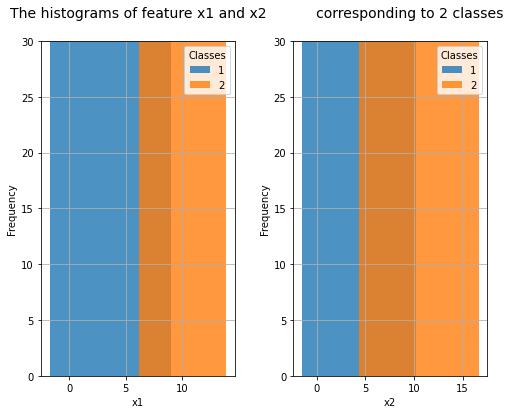

In [11]:
%matplotlib inline

def plot_hist(bin_size, data, title):
    fig = plt.figure(figsize = (8, 6))
    title = fig.suptitle(title, fontsize=14)
    fig.subplots_adjust(top=0.9, wspace=0.3)
    
    for i in range(1, 3):
        ax1 = fig.add_subplot(1,2, i)
        ax1.set_xlabel("x{0}".format(i))
        ax1.set_ylabel("Frequency") 
        ax1.set_ylim([0, 30])
        ax1.legend(title='Classes')
        data["x{0}".format(i)].plot.hist(bins=bin_size, alpha=0.8, legend=True, 
                                         grid=True)


data = df6.groupby("classes")
plot_hist(bin_size=1, data=data, title="The histograms of feature x1 and x2 \
          corresponding to 2 classes")

- From the plot, we see that _x1_ is more discriminatory than _x2_ with a smaller number of errors. However, using _x1_ alone will still result in some errors.

(b) [7 points] Plot the two-dimensional patterns in a graph. Use markers to distinguish the patterns according to their class labels. Suppose you have the following decision rule (classifier) to classify a novel pattern _x = (x1,x2)t:_
<center>If x1 + x2 - 15 < 0, x ∈ ω1 else x ∈ ω2.</center>
In the same graph, plot the decision boundary corresponding to this rule. What is the error rate (i.e., the percentage of patterns that are misclassified) when this decision rule is used to classify the patterns in the given data set?

Text(0.5, 1.0, 'Decision boundary with 0.0005 % error rate')

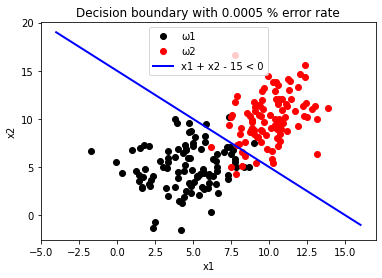

In [12]:
c1 = df6[df6.classes == 1]
c2 = df6[df6.classes == 2]

def decision_rule(train_data, constant):
    result = train_data["x1"] + train_data["x2"] - constant
    y_pred = [1 if i < 0 else 2 for i in result]
    total_sample = train_data["classes"].count()
    numerator = train_data[train_data["classes"] != y_pred].count()
    denominator = total_sample * 100
    miss_rate = numerator / denominator

    return y_pred, miss_rate
    
train_data = df6

# model the curve decision boundary 1
def dc1_gen(x):
    y = 15 - x
    return y

x1_linspace = np.linspace(-4, 16, 1000)
y1_linspace = dc1_gen(x1_linspace)

y_pred1, miss_rate1 = decision_rule(train_data, 15)
# print(miss_rate1)

plt.plot(c1["x1"], c1["x2"], 'ko', label="ω1")
plt.plot(c2["x1"], c2["x2"], 'ro', label="ω2")
plt.plot(x1_linspace, y1_linspace, 'b-', linewidth=2, label='x1 + x2 - 15 < 0')

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision boundary with {} % error rate".format(miss_rate1.x1))

    - The error rate is 5 %

(c) [7 points] Repeat the above after modifying the decision rule (classifier) as follows:
<center>If x1 + x2 − 12 < 0, x ∈ ω1 else x ∈ ω2.</center>

Text(0.5, 1.0, 'Decision boundary with 0.00135 % error rate')

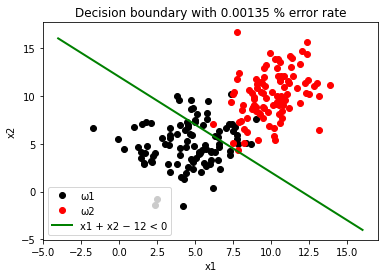

In [13]:
# model the curve decision boundary 2
def dc2_gen(x):
    y = 12 - x
    return y

x2_linspace = np.linspace(-4, 16, 1000)
y2_linspace = dc2_gen(x2_linspace)


y_pred2, miss_rate2 = decision_rule(train_data, 12)
# print(miss_rate2)


plt.plot(c1["x1"], c1["x2"], 'ko', label="ω1")
plt.plot(c2["x1"], c2["x2"], 'ro', label="ω2")
plt.plot(x2_linspace, y2_linspace, 'g-', linewidth=2, label='x1 + x2 − 12 < 0')

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision boundary with {} % error rate".format(miss_rate2.x1))

(d) [3 points] Which of the two classifiers has performed well on this dataset?

- The _x1 + x2 - 15 < 0, x ∈ ω1 else x ∈ ω2_ decision rule has performed well on this dataset with only 5% error rate

References:
- https://numpy.org/
- https://pandas.pydata.org/
- https://matplotlib.org/
- https://seaborn.pydata.org/